## 5.1.2 下方半分散

### 下方半分散最小化問題

コード 5.1 pyfin_sv_portfolio.py

In [2]:
pip install cvxpy

Note: you may need to restart the kernel to use updated packages.


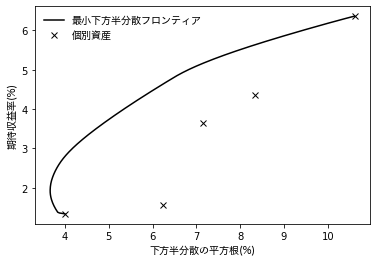

In [5]:
# -*- coding: utf-8 -*-
#%% NumPyの読み込み
import numpy as np
#   CVXPYの読み込み
import cvxpy as cvx
#   Pandasの読み込み
import pandas as pd
#   MatplotlibのPyplotモジュールの読み込み
import matplotlib.pyplot as plt
#   日本語フォントの設定
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
jpfont = FontProperties(fname=FontPath)
#%% 収益率データの読み込み
R = pd.read_csv('asset_return_data.csv', index_col=0)
T = R.shape[0]
N = R.shape[1]
Mu = R.mean().values
Return_Dev = (R - Mu).values / np.sqrt(T)
#%% 下方半分散最小化問題の設定
Weight = cvx.Variable(N)
Deviation = cvx.Variable(T)
Target_Return = cvx.Parameter(nonneg=True)
Risk_Semivariance = cvx.sum_squares(Deviation)
Opt_Portfolio = cvx.Problem(cvx.Minimize(Risk_Semivariance),
                            [Weight.T @ Mu == Target_Return,
                             cvx.sum(Weight) == 1.0,
                             Weight >= 0.0,
                             Deviation >= 0.0,
                             Return_Dev @ Weight + Deviation >= 0.0])
#%% 最小下方半分散フロンティアの計算
V_Target = np.linspace(Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros(V_Target.shape)
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(solver=cvx.ECOS)
    V_Risk[idx] = np.sqrt(Risk_Semivariance.value)
#%% 最小下方半分散フロンティアのグラフの作成
fig1 = plt.figure(1, facecolor='w')
plt.plot(V_Risk, V_Target, 'k-')
plt.plot(np.sqrt(((R[R <= Mu] - Mu) ** 2).sum().values / T), Mu, 'kx')
plt.legend([u'最小下方半分散フロンティア', u'個別資産'],
           loc='best', frameon=False, prop=jpfont)
plt.xlabel(u'下方半分散の平方根(%)', fontproperties=jpfont)
plt.ylabel(u'期待収益率(%)', fontproperties=jpfont)
plt.show()